
### Electric wave propagation
$$
\begin{align*}
e_t & = d\\
d_t &= - \text{curl curl }e \\
\text{ div } d &= 0
\end{align*}
$$

Since $(e,d)\in H(curl)\times H(div)$ we need to perform an $L_2$-projection
we need to solve at each time step $n$ the following projection: 
$$
\begin{align*}
\hat{e}^n& = e^{n}\\
\hat{d}^n &= \text{curl curl }e^n \\
\text{div }\hat{d}^n& = 0\\
\end{align*}
$$
and:
$$
\begin{align*}
e^{n+1} & = e^{n} -\tau \hat{e}^n \\
d^{n+1}  &= d^{n} -\tau \hat{d}^n \\
\end{align*}
$$

### Numerical implementation:
When we apply the Galerkin discretization we obtain something of the following form:

$$
\begin{align*}
M_{e} \,\hat{\underline e}^n & = M_{ed}\, \underline d^{n}\\
M_{d} \hat{\underline d}^n &=  M_{de} K \, \underline e^n \\
\text{div }\hat{\underline d}^n& = 0\\
\end{align*}
$$
Ans to step foreward:
$$
\begin{align*}
\underline e^{n+1} & = \underline e^{n} -\tau \hat{\underline e}^n \\
\underline d^{n+1}  &= \underline d^{n} -\tau \hat{\underline d}^n \\
\end{align*}
$$




In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.csg import unit_cube
import matplotlib.pyplot as plt

In [2]:

Maxh = 0.11
Order = 3
mesh = Mesh(unit_cube.GenerateMesh(maxh=Maxh))

fesCurl = HCurl(mesh, order=Order )
fesDiv = HDiv(mesh, order=Order   , dirichlet= ".*")
fesL2 = L2(mesh, order=Order-1)

fes =  fesCurl*fesDiv
fesP =  fesDiv*fesL2 

peak = exp(-35*( (x-0.5)**2 + (y-0.5)**2 +(z-0.5)**2))
PEAK = CF ( (0, 0, peak ), dims=(3,1))

eps = CF((1), dims=(1,1))
mu =  CF((1), dims=(1,1))

#electric field
elfield = GridFunction(fes) 
e, d = elfield.components
e.Set ( PEAK, bonus_intorder=10, dual=True)

Pelfield = GridFunction(fesP) 
Pd, Pq = Pelfield.components

uc, ud , = fes.TrialFunction()
vc, vd , = fes.TestFunction()


In [3]:

# method
B = BilinearForm(fes, symmetric=True)
B += -InnerProduct( curl(uc), curl(vc) )*dx
B += InnerProduct(ud, vd)*dx

M = BilinearForm(fes, symmetric=True)
M += InnerProduct(uc, vc)*dx
M += InnerProduct(ud, vd)*dx 
 
Mm = BilinearForm(fes, symmetric=True)
Mm += InnerProduct(uc, vd)*dx
Mm += InnerProduct(ud, vc)*dx 

B.Assemble()
M.Assemble()
Mm.Assemble()


In [4]:

# We need to define a projection 

u, p  = fesP.TrialFunction()
v, q  = fesP.TestFunction()

P = BilinearForm(fesP)
P +=  v*u * dx
P +=  div( v)*p * dx
P +=  div( u)*q * dx

F = BilinearForm(fesP)
F +=  v*u * dx

P.Assemble()
F.Assemble()

In [5]:
invP = P.mat.Inverse()

In [ ]:
inv  = M.mat.Inverse()

In [7]:
scene_e = Draw(e, mesh,clipping=(0,0,1))
#scene_divd = Draw(div(d), mesh,clipping=(0,0,1) ,draw_surf=False)
scene_d = Draw(d, mesh,clipping=(0,0,1))
t =   0.2
tau = 0.002
h = 0
Energy = []
while h < t :
    h+=tau

    #for small steps only this one works
    elfield.vec.data += tau*inv*(Mm.mat*(inv*(B.mat*elfield.vec)))

    #elfield.vec.data += tau*inv*(Mm.mat*(B.mat*elfield.vec))

    Pd.vec.data = d.vec
    Pelfield.vec.data =  invP*(F.mat*Pelfield.vec)
    d.vec.data = Pd.vec
    Energy.append(Integrate(InnerProduct(e,e),mesh))
    scene_e.Redraw()
    #print(h)
    #scene_divd.Redraw()
    scene_d.Redraw()
    


WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 3, 'order2d': 2, 'order3d': 2, 'draw_vol': True…

WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 3, 'order2d': 2, 'order3d': 2, 'draw_vol': True…

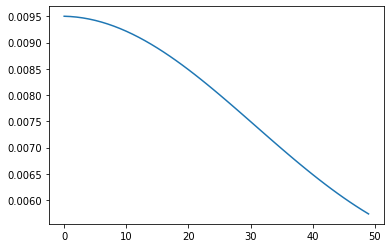

In [8]:
plt.plot(Energy)

In [9]:
Energy

[0.009500991560450879,
 0.009495678517829006,
 0.00948506362840229,
 0.009469172983326024,
 0.009448047490376654,
 0.009421742733285249,
 0.009390328770603128,
 0.009353889876303279,
 0.009312524224871143,
 0.009266343523971684,
 0.009215472597873921,
 0.009160048924678876,
 0.009100222130077716,
 0.009036153439934611,
 0.008968015093533049,
 0.008895989718941975,
 0.008820269671734035,
 0.008741056338290325,
 0.008658559405184061,
 0.008572996096643826,
 0.00848459038280892,
 0.008393572162326307,
 0.008300176423693123,
 0.008204642390515002,
 0.00810721265641825,
 0.0080081323156478,
 0.007907648095354446,
 0.007806007495225003,
 0.0077034579394793514,
 0.007600245945431089,
 0.007496616311891809,
 0.007392811329813311,
 0.007289070016820008,
 0.007185627376776297,
 0.007082713685311737,
 0.006980553802299954,
 0.006879366512615738,
 0.006779363897000202,
 0.00668075073544133,
 0.006583723946008192,
 0.006488472062450172,
 0.0063951747540032244,
 0.0063040023906771,
 0.00621511565682